<h1>Previsione del punteggio in Matematica</h1>

<h2>Progetto a cura di :</h2>
<ul>
  <li>Capalbo Matteo, matricola: 242482</li>
  <li>Gabriele Nicola, matricola: 242444</li>
</ul>

<p>il seguente progetto punta ad applicare diverse tecniche di Data Mining viste durante il corso su dati relativi a studenti, in particolare, sul voto che questi hanno conseguito in esami di matematica</p>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import Image

In [8]:
DATASET_LOCATION="./dataset/expandedDataSet.csv" 
IMG_METRICHE="./MetricheImg"

In [9]:
ds = pd.read_csv(DATASET_LOCATION)

In [10]:
ds.head(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


<h1><b>DESCRIZIONE DEGLI ATTRIBUTI</b></h1>
<p>procediamo, per prima cosa, a descrivere brevemente che tipo di attributi abbiamo a disposizione:</p>
<ul>
    <li><b>Gender:</b> Genere dello studente (Maschio/Femmina) </li>
    <li><b>EthnicGroup:</b> Gruppo Etnico degli studenti (group A to E)</li>
    <li><b>ParentEduc:</b> Grado di Istruzione dei Genitori (Dalle scuole superiori alla laurea Magistrale)</li>
    <li><b>LunchType:</b> Tipo di Pranzo fatto a scuola (standard o libero/ridotto) </li>
    <li><b>TestPrep:</b> Corso di preparazione al test seguito (Completato oppure no)</li>
    <li><b>ParentMaritalStatus:</b> Stato sociale dei genitori (Sposati/Single/Divorziati/Vedovi)</li>
    <li><b>PracticeSport:</b> Quanto spesso lo studente pratica Sport (mai/qualche volta/regolarmente))</li>
    <li><b>IsFirstChild:</b> Se è il primo figlio o meno</li>
    <li><b>NrSiblings:</b> Numero di Sorelle/Fratelli che uno studente ha (0 to 7)</li>
    <li><b>TransportMeans:</b> Mezzo di trasporto per raggiungere scuola (Bus/Privato)</li>
    <li><b>WklyStudyHours:</b> Ore settimanali di studio (Meno di 5hrs; Tra 5 e 10hrs; Più di 10hrs)</li>
    <li><b>MathScore:</b> Punteggio ottenuto nel test di Matematica(0-100)</li>
    <li><b>ReadingScore:</b> Punteggio ottenuto nel test di Reading(0-100)</li>
    <li><b>WritingScore:</b> Punteggio ottenuto nel test di Writing(0-100)</li>
</ul>


<h1>Fase di Pre-processing</h1>
<p>In questa prima sezione andremo ad analizzare il dataset e ad effettuare delle statistiche sugli attributi. Cercando di capire quali attributi sono importanti, quali bisogna modificare, affinchè si possano ottenere dei buoni modelli di classificazione, e quali di essi vadano eliminati. Per prima cosa andiamo a visualizzare, per ogni attributo, il numero di dati mancanti al fine di capire quali di questi attributi devono essere esclusi dall'analisi:</p>

In [11]:
ds.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

<p> Eliminiamo la colonna TransportMeans in quanto risulta avere troppi dati mancanti</p>

In [12]:
ds.drop("TransportMeans",axis=1,inplace=True)

<p> Eliminiamo la colonna unnamed 0 in quanto è un indice, e quindi non significativo ai fini dell'analisi

In [13]:
ds.drop("Unnamed: 0",axis=1,inplace=True)

<p> Eliminiamo le osservazioni che presentano dati mancanti</p>

In [14]:
ds.dropna(inplace=True)

<p> Eliminiamo le righe che contengono istanze duplicate</p>

In [15]:
ds.drop_duplicates(inplace=True)

<p>Mappiamo i valori degli attributi categorici su attributi numerici utilizzando one hot encoding al fine di consentire una manipolazione agevole da parte degli algoritmi che verranno utilizzati successivamente</p>

In [16]:
ds.Gender.replace({'male':1,'female':0},inplace=True)

In [17]:
ds_= pd.get_dummies(ds['ParentEduc'], prefix='ParEduc')
ds = ds.join(ds_).drop('ParentEduc',axis=1)

In [18]:
ds_= pd.get_dummies(ds['EthnicGroup'], prefix='EG')
ds = ds.join(ds_).drop('EthnicGroup',axis=1)

In [19]:
ds_= pd.get_dummies(ds['ParentMaritalStatus'], prefix='ParMarStat')
ds = ds.join(ds_).drop('ParentMaritalStatus',axis=1)

In [20]:
ds_= pd.get_dummies(ds['PracticeSport'], prefix='sport')
ds = ds.join(ds_).drop('PracticeSport',axis=1)

In [21]:
ds.IsFirstChild.replace({'yes':1,'no':0},inplace=True)

In [22]:
ds_= pd.get_dummies(ds['WklyStudyHours'], prefix='studyHours')
ds = ds.join(ds_).drop('WklyStudyHours',axis=1)

In [23]:
ds.TestPrep.replace({'completed':1, 'none':0},inplace=True)

In [24]:
ds.LunchType.replace({'standard':1, 'free/reduced':0},inplace=True)

In [25]:
ds.head(10)

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,MathScore,ReadingScore,WritingScore,ParEduc_associate's degree,ParEduc_bachelor's degree,...,ParMarStat_divorced,ParMarStat_married,ParMarStat_single,ParMarStat_widowed,sport_never,sport_regularly,sport_sometimes,studyHours_5 - 10,studyHours_< 5,studyHours_> 10
2,0,1,0,1,4.0,87,93,91,False,False,...,False,False,True,False,False,False,True,False,True,False
3,1,0,0,0,1.0,45,56,42,True,False,...,False,True,False,False,True,False,False,True,False,False
4,1,1,0,1,0.0,76,78,75,False,False,...,False,True,False,False,False,False,True,True,False,False
5,0,1,0,1,1.0,73,84,79,True,False,...,False,True,False,False,False,True,False,True,False,False
6,0,1,1,0,1.0,85,93,89,False,False,...,False,False,False,True,True,False,False,True,False,False
7,1,0,0,1,1.0,41,43,39,False,False,...,False,True,False,False,False,False,True,False,False,True
8,1,0,1,0,3.0,65,64,68,False,False,...,False,False,True,False,False,False,True,False,False,True
11,1,1,0,1,1.0,40,52,43,True,False,...,True,False,False,False,False,False,True,True,False,False
12,0,1,0,0,1.0,66,82,74,False,False,...,False,True,False,False,False,True,False,True,False,False
13,1,1,1,1,1.0,80,73,71,False,False,...,False,False,True,False,False,False,True,False,False,True


<p> A questo punto andiamo ad effettuare la standardizzazione automatica messa a disposizione da ScikitLearn mediante l'utilizzo dello StandardScaler. </p>

In [26]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
#Introduciamo la standardizzazione automatica di scikit learn
lista = ds.columns.values.tolist()
diz = {}
for i in range(len(lista)):
    diz[i] = lista[i]
scaler = preprocessing.StandardScaler().fit(ds)
X_scaled = scaler.transform(ds)
#Viene mantenuto l'ordine delle colonne quando si standardizza, quindi andiamo a sostituire gli indici con i nomi
#delle colonne del Dataset, questo ci servirà per suddividere il Dataset in Train e Test -set
dsn = pd.DataFrame(X_scaled)
dsn.rename(diz, axis='columns', inplace=True) 

<p> A questo punto mediante la visualizzazione di una Scatter Matrix parziale, andiamo a verificare per diverse features la significatività di esse, così da andare ad eliminare le features che non risultano per nulla significative ai fini dell'obiettivo finale </p>

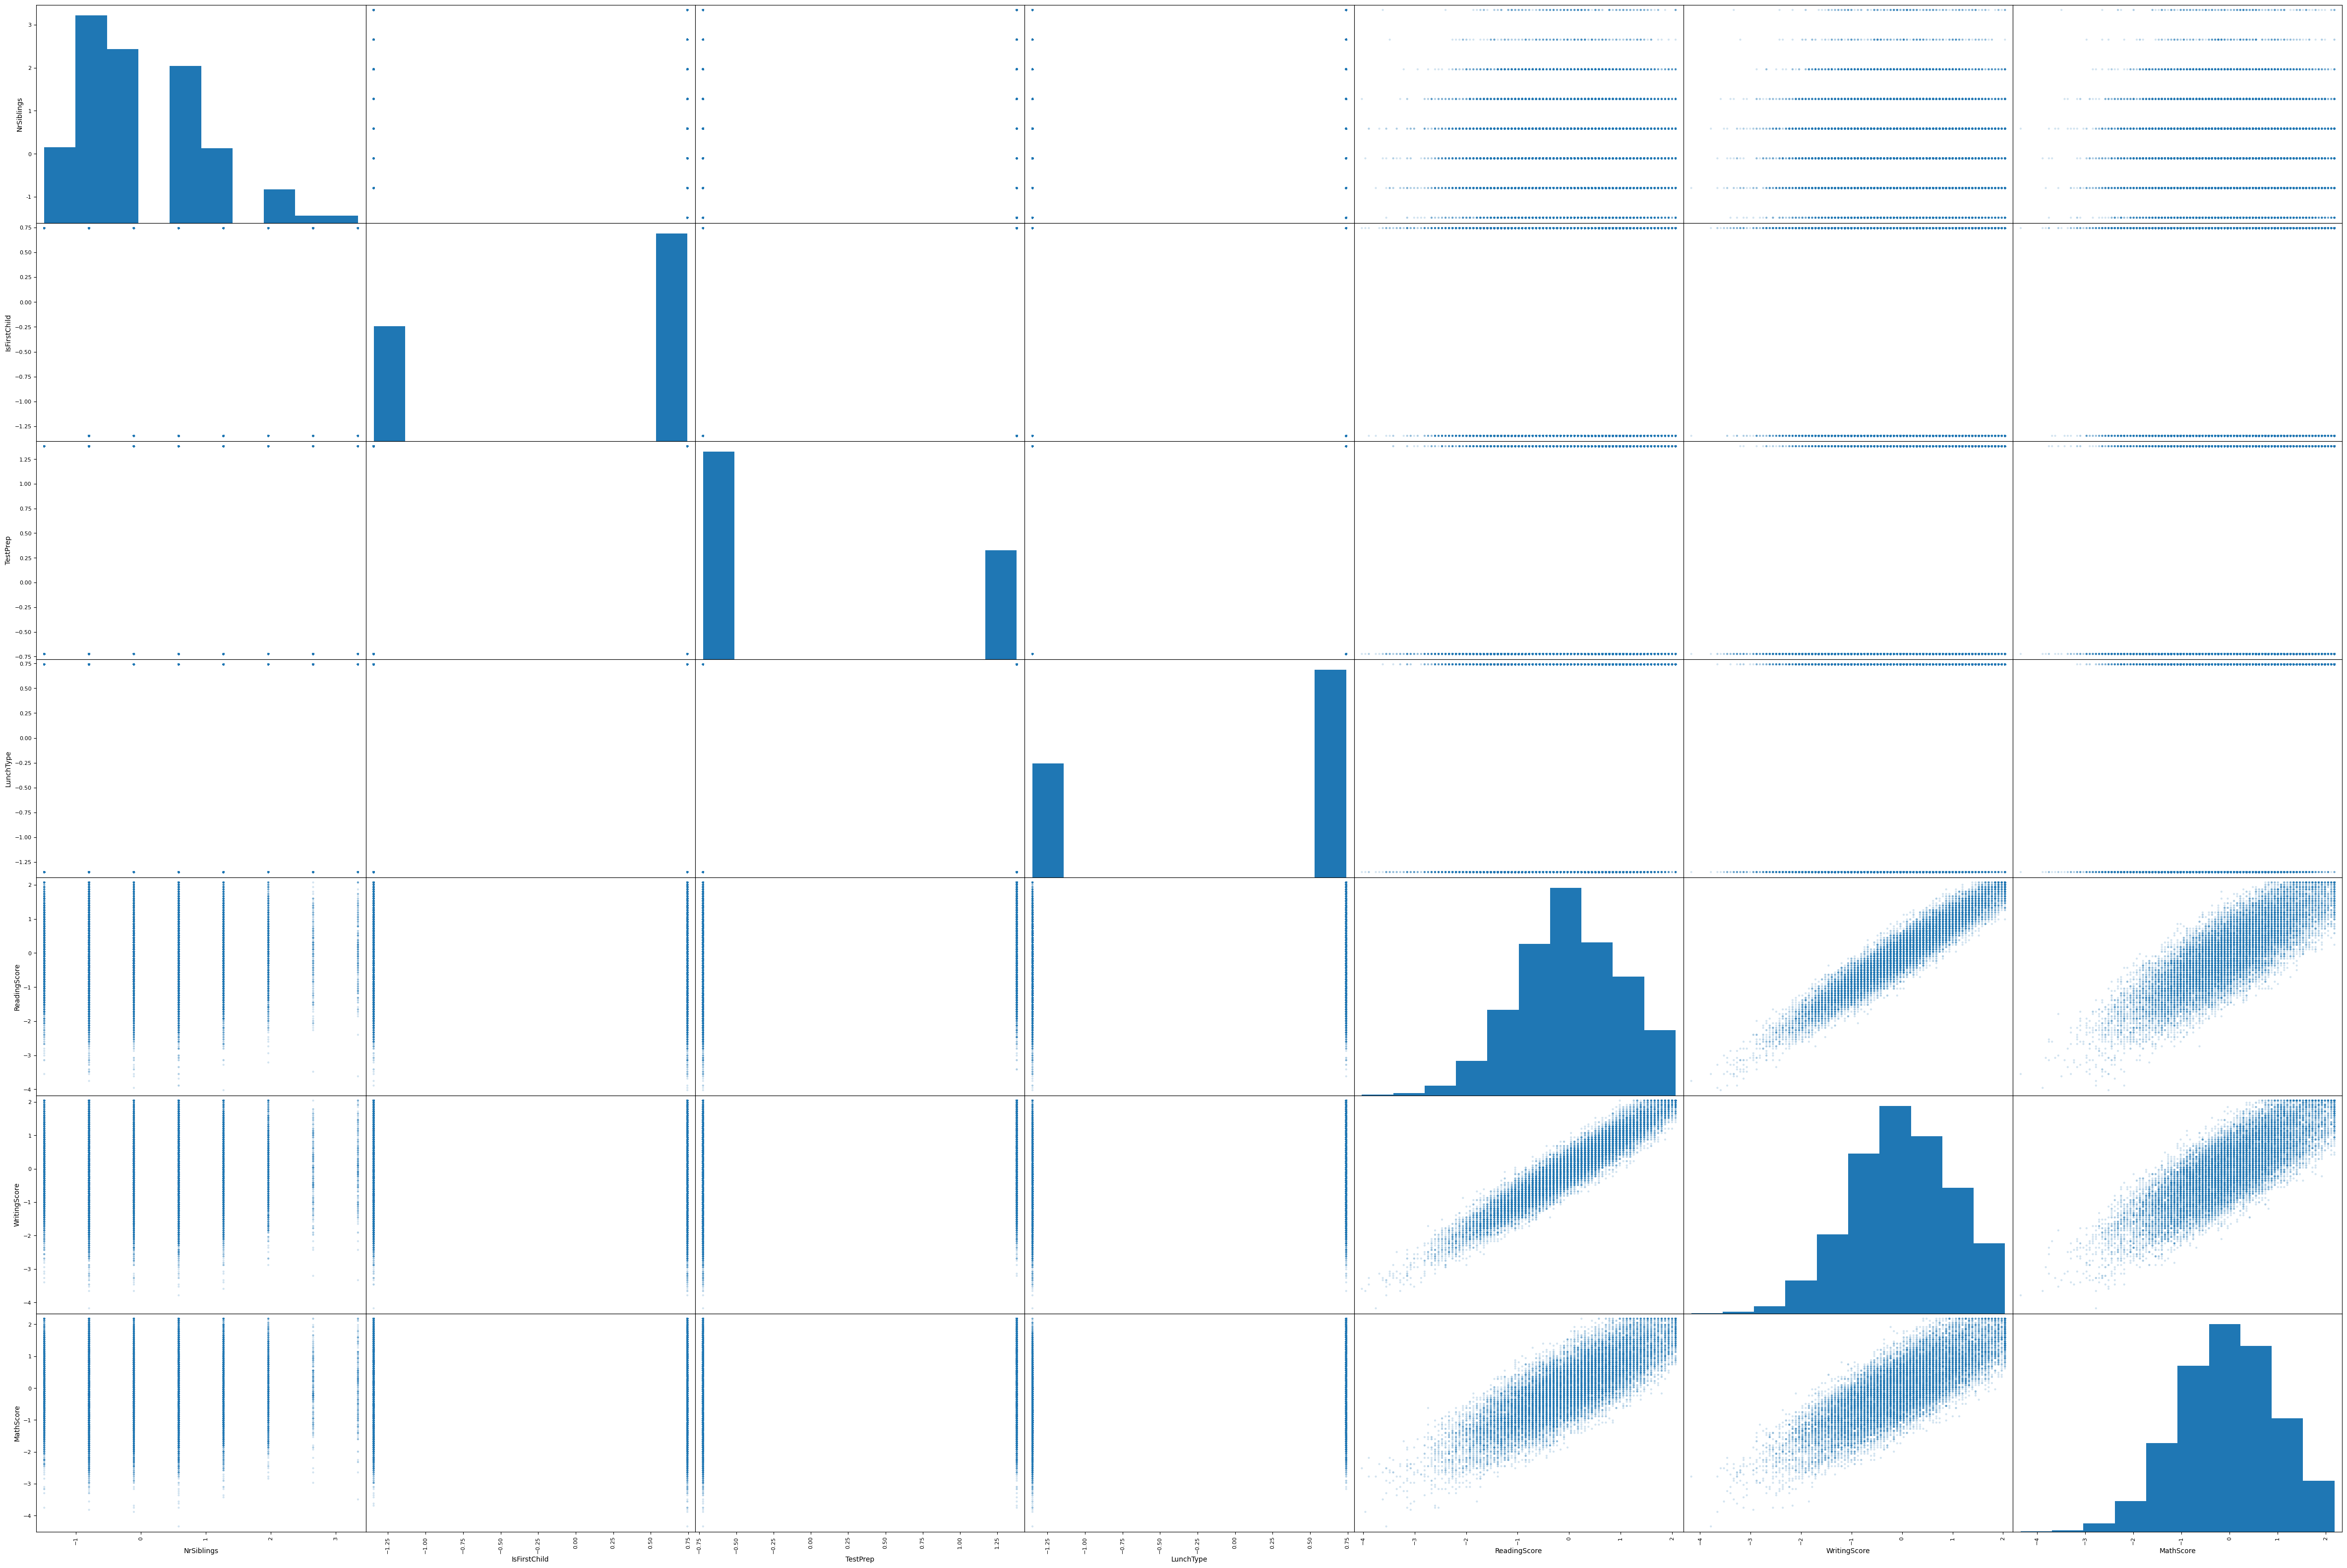

In [27]:
import numpy as np
np.random.seed(50)

from pandas.plotting import scatter_matrix

#dsn.info()
attributes = ['NrSiblings','IsFirstChild','TestPrep','LunchType','ReadingScore','WritingScore','MathScore']

scatter_matrix(dsn[attributes], figsize=(60,40),alpha=0.2)
plt.show()


<p>Osserviamo che la features "LunchType" risulta essere non significativa ai fini dell'analisi per cui decidiamo di eliminarla dal dataset, mentre "TestPrep", "IsFirstChild" e "NrSiblings" sembrano essere significative anche se non in modo evidente, scegliamo dunque di non eliminarle</p>

In [28]:
dsn.drop("LunchType",axis=1,inplace=True)

<p>Osserviamo inoltre che ReadingScore e WritingScore sono tra loro molto correlate, per cui decidiamo di aggregarle inserendo un attributo formato dalla media dei 2 valori </p>

In [29]:
new = pd.Series((dsn.ReadingScore+dsn.WritingScore)/2,name='RWScore')
dsn.drop(['ReadingScore','WritingScore'],axis=1,inplace=True)
dsn = dsn.join(new)

<p> Analizziamo adesso la significatività ai fini dell'analisi dei diversi gruppi etnici, avvalendoci ancora una volta della scatter matrix</p>

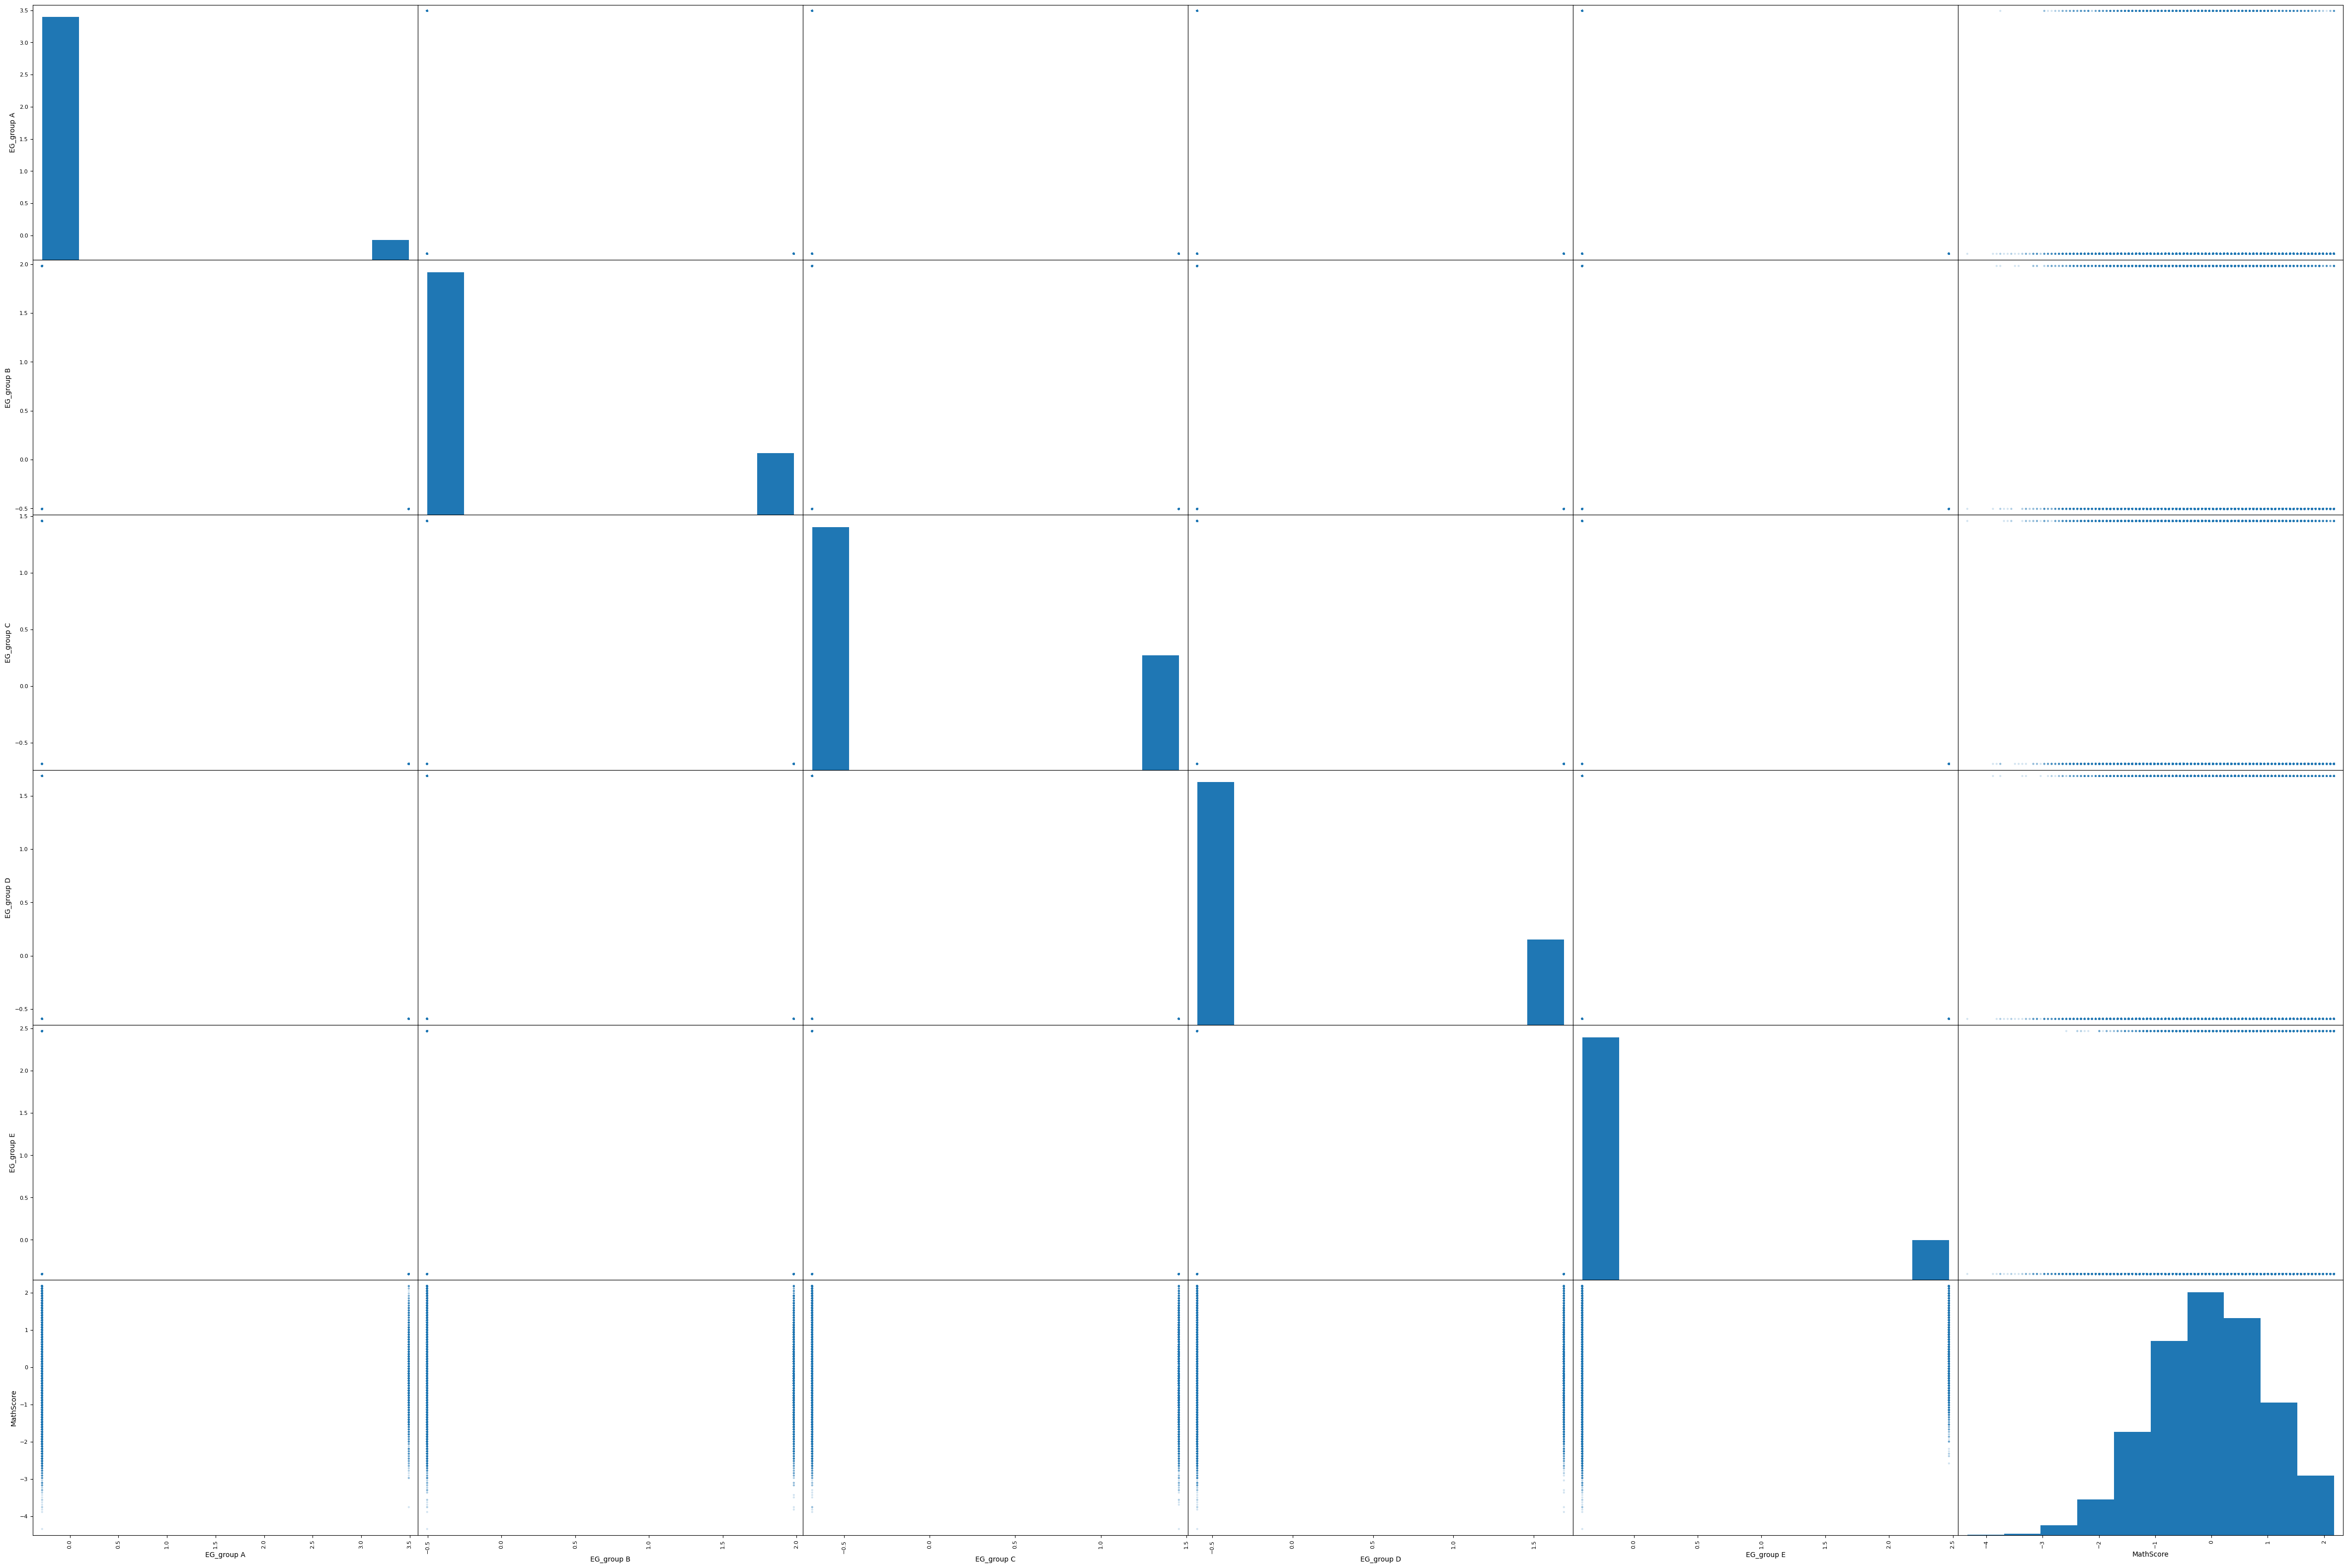

In [30]:
attributes = ['EG_group A','EG_group B','EG_group C','EG_group D','EG_group E','MathScore']

scatter_matrix(dsn[attributes], figsize=(60,40),alpha=0.2)
plt.show()

<p>Osserviamo che la disposizione dei punti relativi al MathScore per i vari gruppi etnici è diversa per cui riteniamo che possa essere una features utile, decidiamo dunque di mantenerla</p>

<p> Wffettuiamo la stessa analisi anche per gli attributi relativi al titolo di studio dei genitori</p>

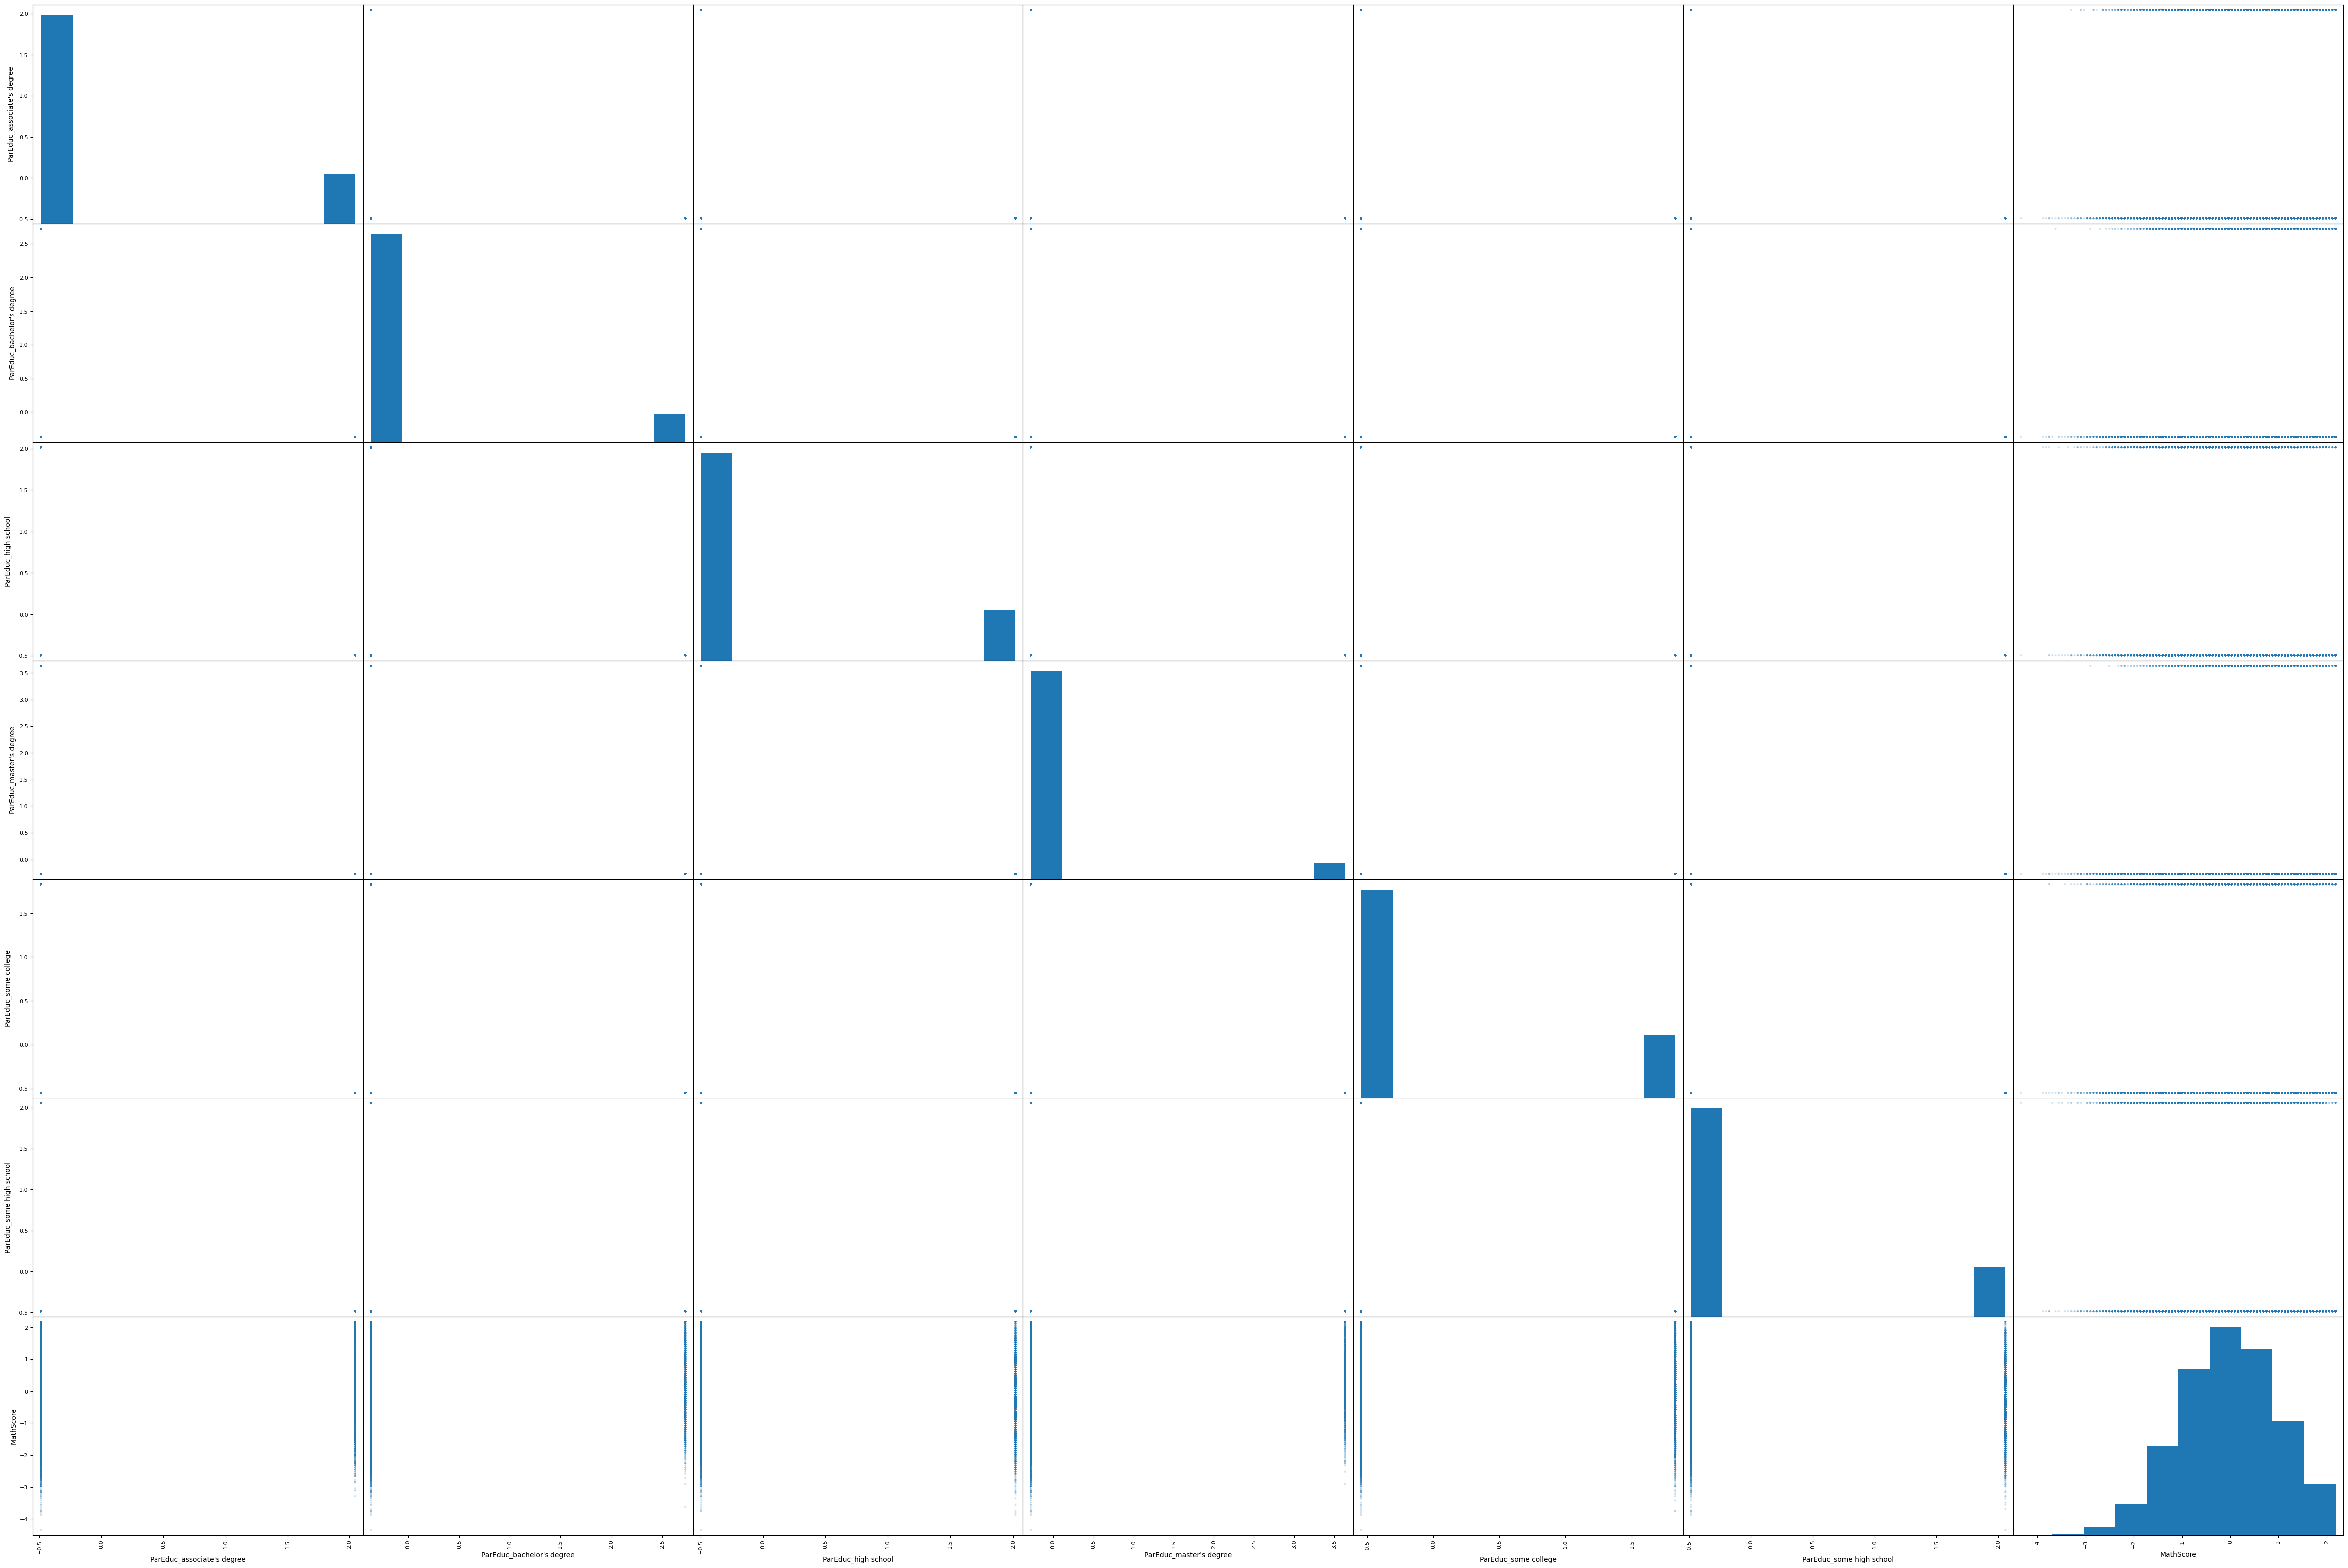

In [31]:
attributes = ['ParEduc_associate\'s degree','ParEduc_bachelor\'s degree','ParEduc_high school','ParEduc_master\'s degree','ParEduc_some college','ParEduc_some high school','MathScore']

scatter_matrix(dsn[attributes], figsize=(60,40),alpha=0.2)
plt.show()

<p>Osserviamo che la distribuzione dei punti varia al variare del tipo di titolo di studio dei genitori per cui riteniamo opportuno mantenere la feature</p>

<p> Proseguiamo analizzando la scatter matrix per lo stato civile dei genitori </p>

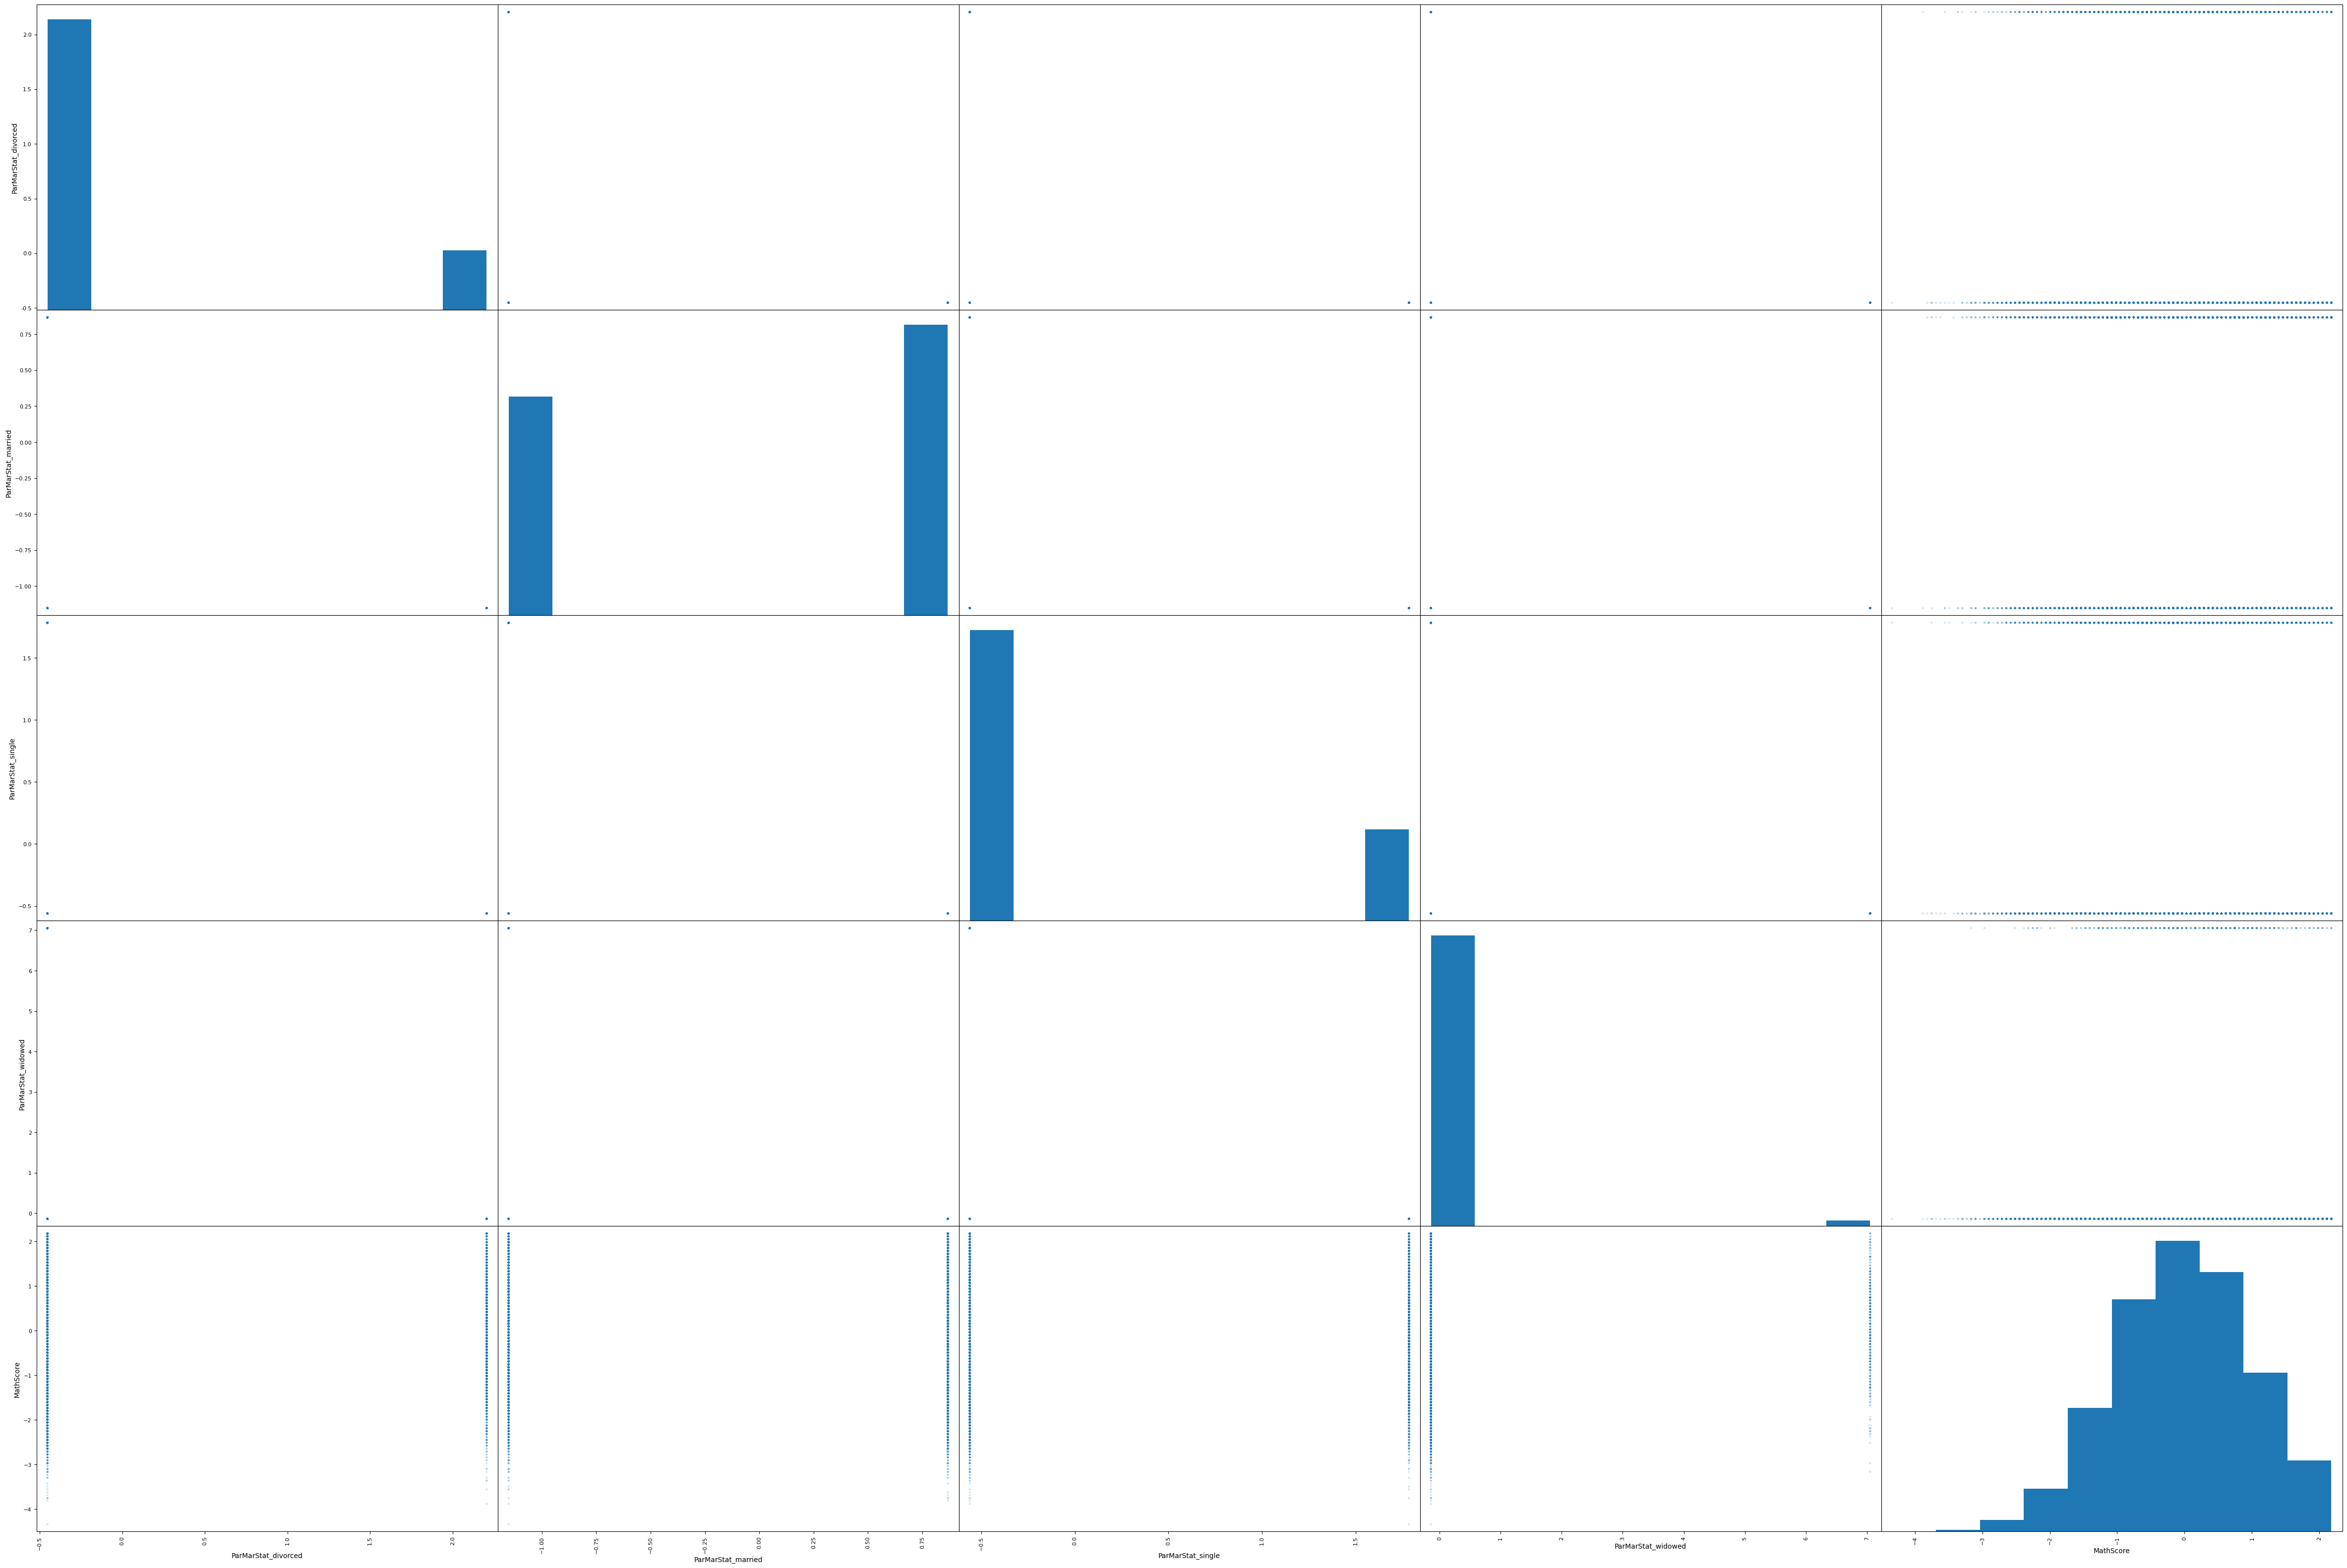

In [32]:
attributes = ['ParMarStat_divorced','ParMarStat_married','ParMarStat_single','ParMarStat_widowed','MathScore']

scatter_matrix(dsn[attributes], figsize=(60,40),alpha=0.2)
plt.show()

<p> Vi sono delle differenze nella distribuzione dei punti per i vari tipi di stato sociale, dunque decidiamo di mantenere la feature</p>

<p>Procediamo ad analizzare la scatter matrix per gli attributi che riguardano la pratica dello sport da parte degli studenti</p>

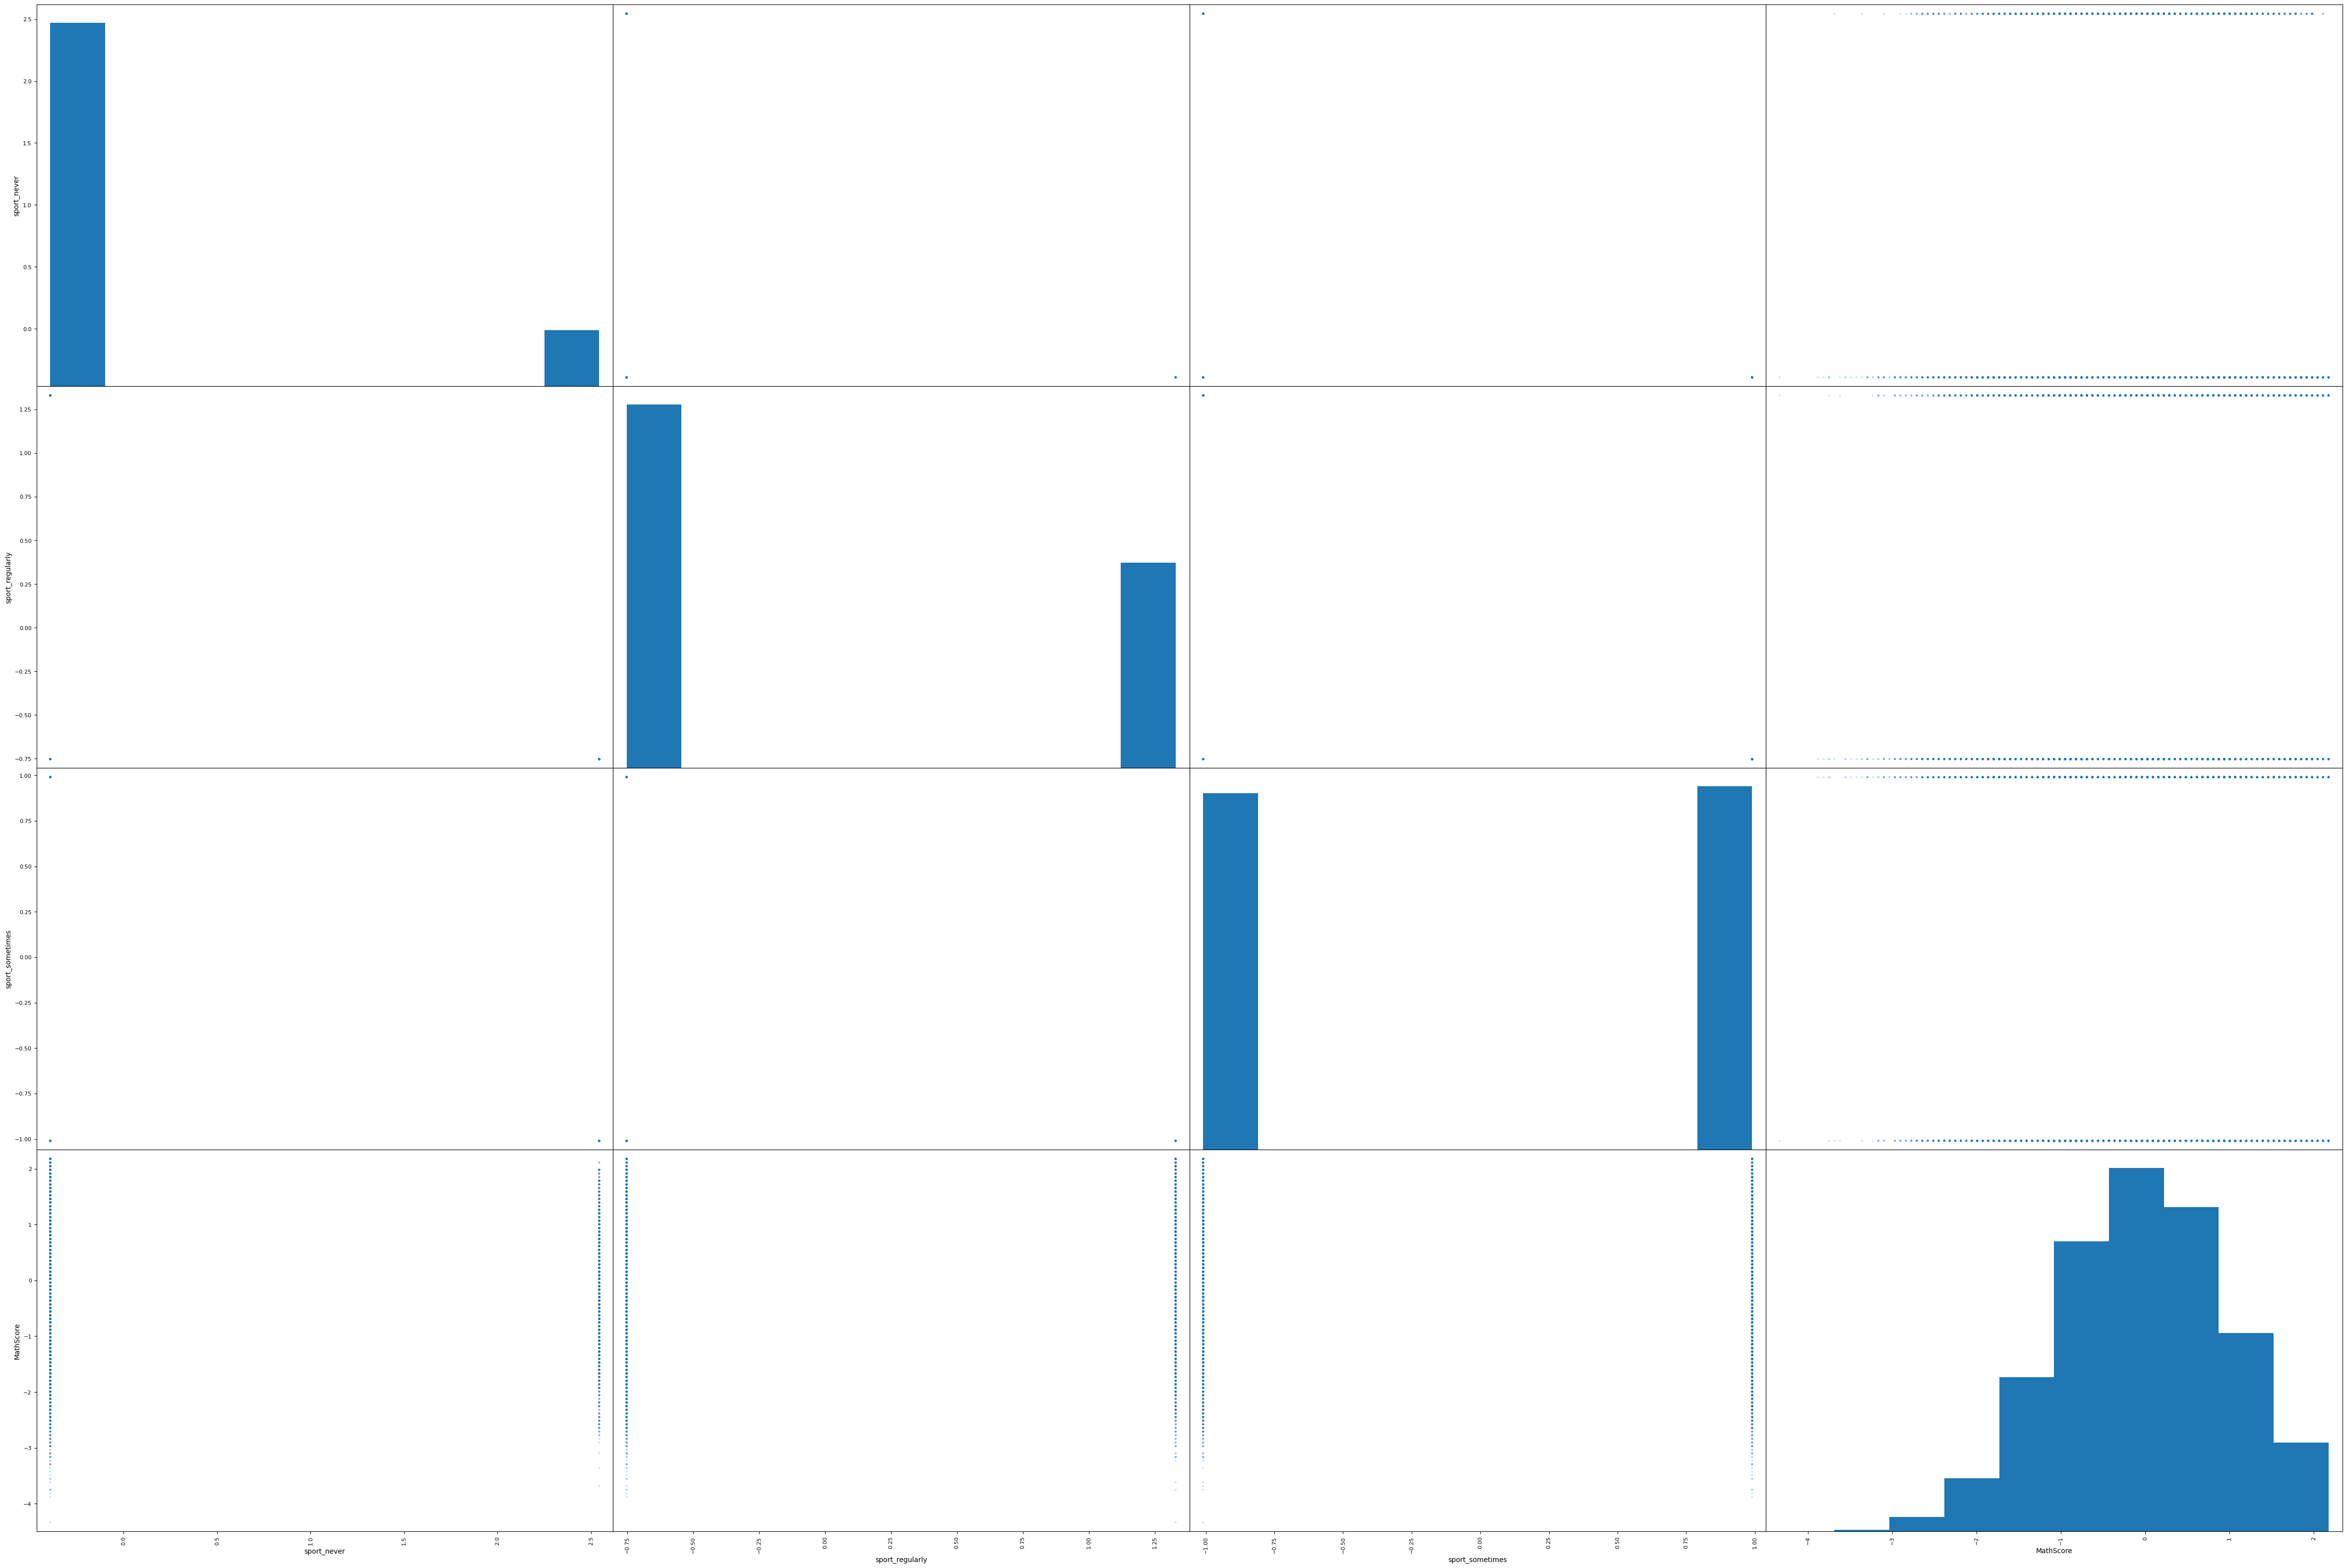

In [33]:
attributes = ['sport_never','sport_regularly','sport_sometimes','MathScore']

scatter_matrix(dsn[attributes], figsize=(60,40),alpha=0.2)
plt.show()

<p> Osserviamo che, contrariamente alle nostre aspettative, per stili di vita differenti la distribuzione del punteggio in matematica sembrerebbe rimanere invariata, decidiamo di eliminare le colonne relative allo sport in quanto non significative </p>

In [34]:
dsn.drop(['sport_never', 'sport_regularly','sport_sometimes'],axis=1, inplace=True)

<p> Infine analizziamo la scatter matrix anche per gli attributi legati alle ore di studio</p>

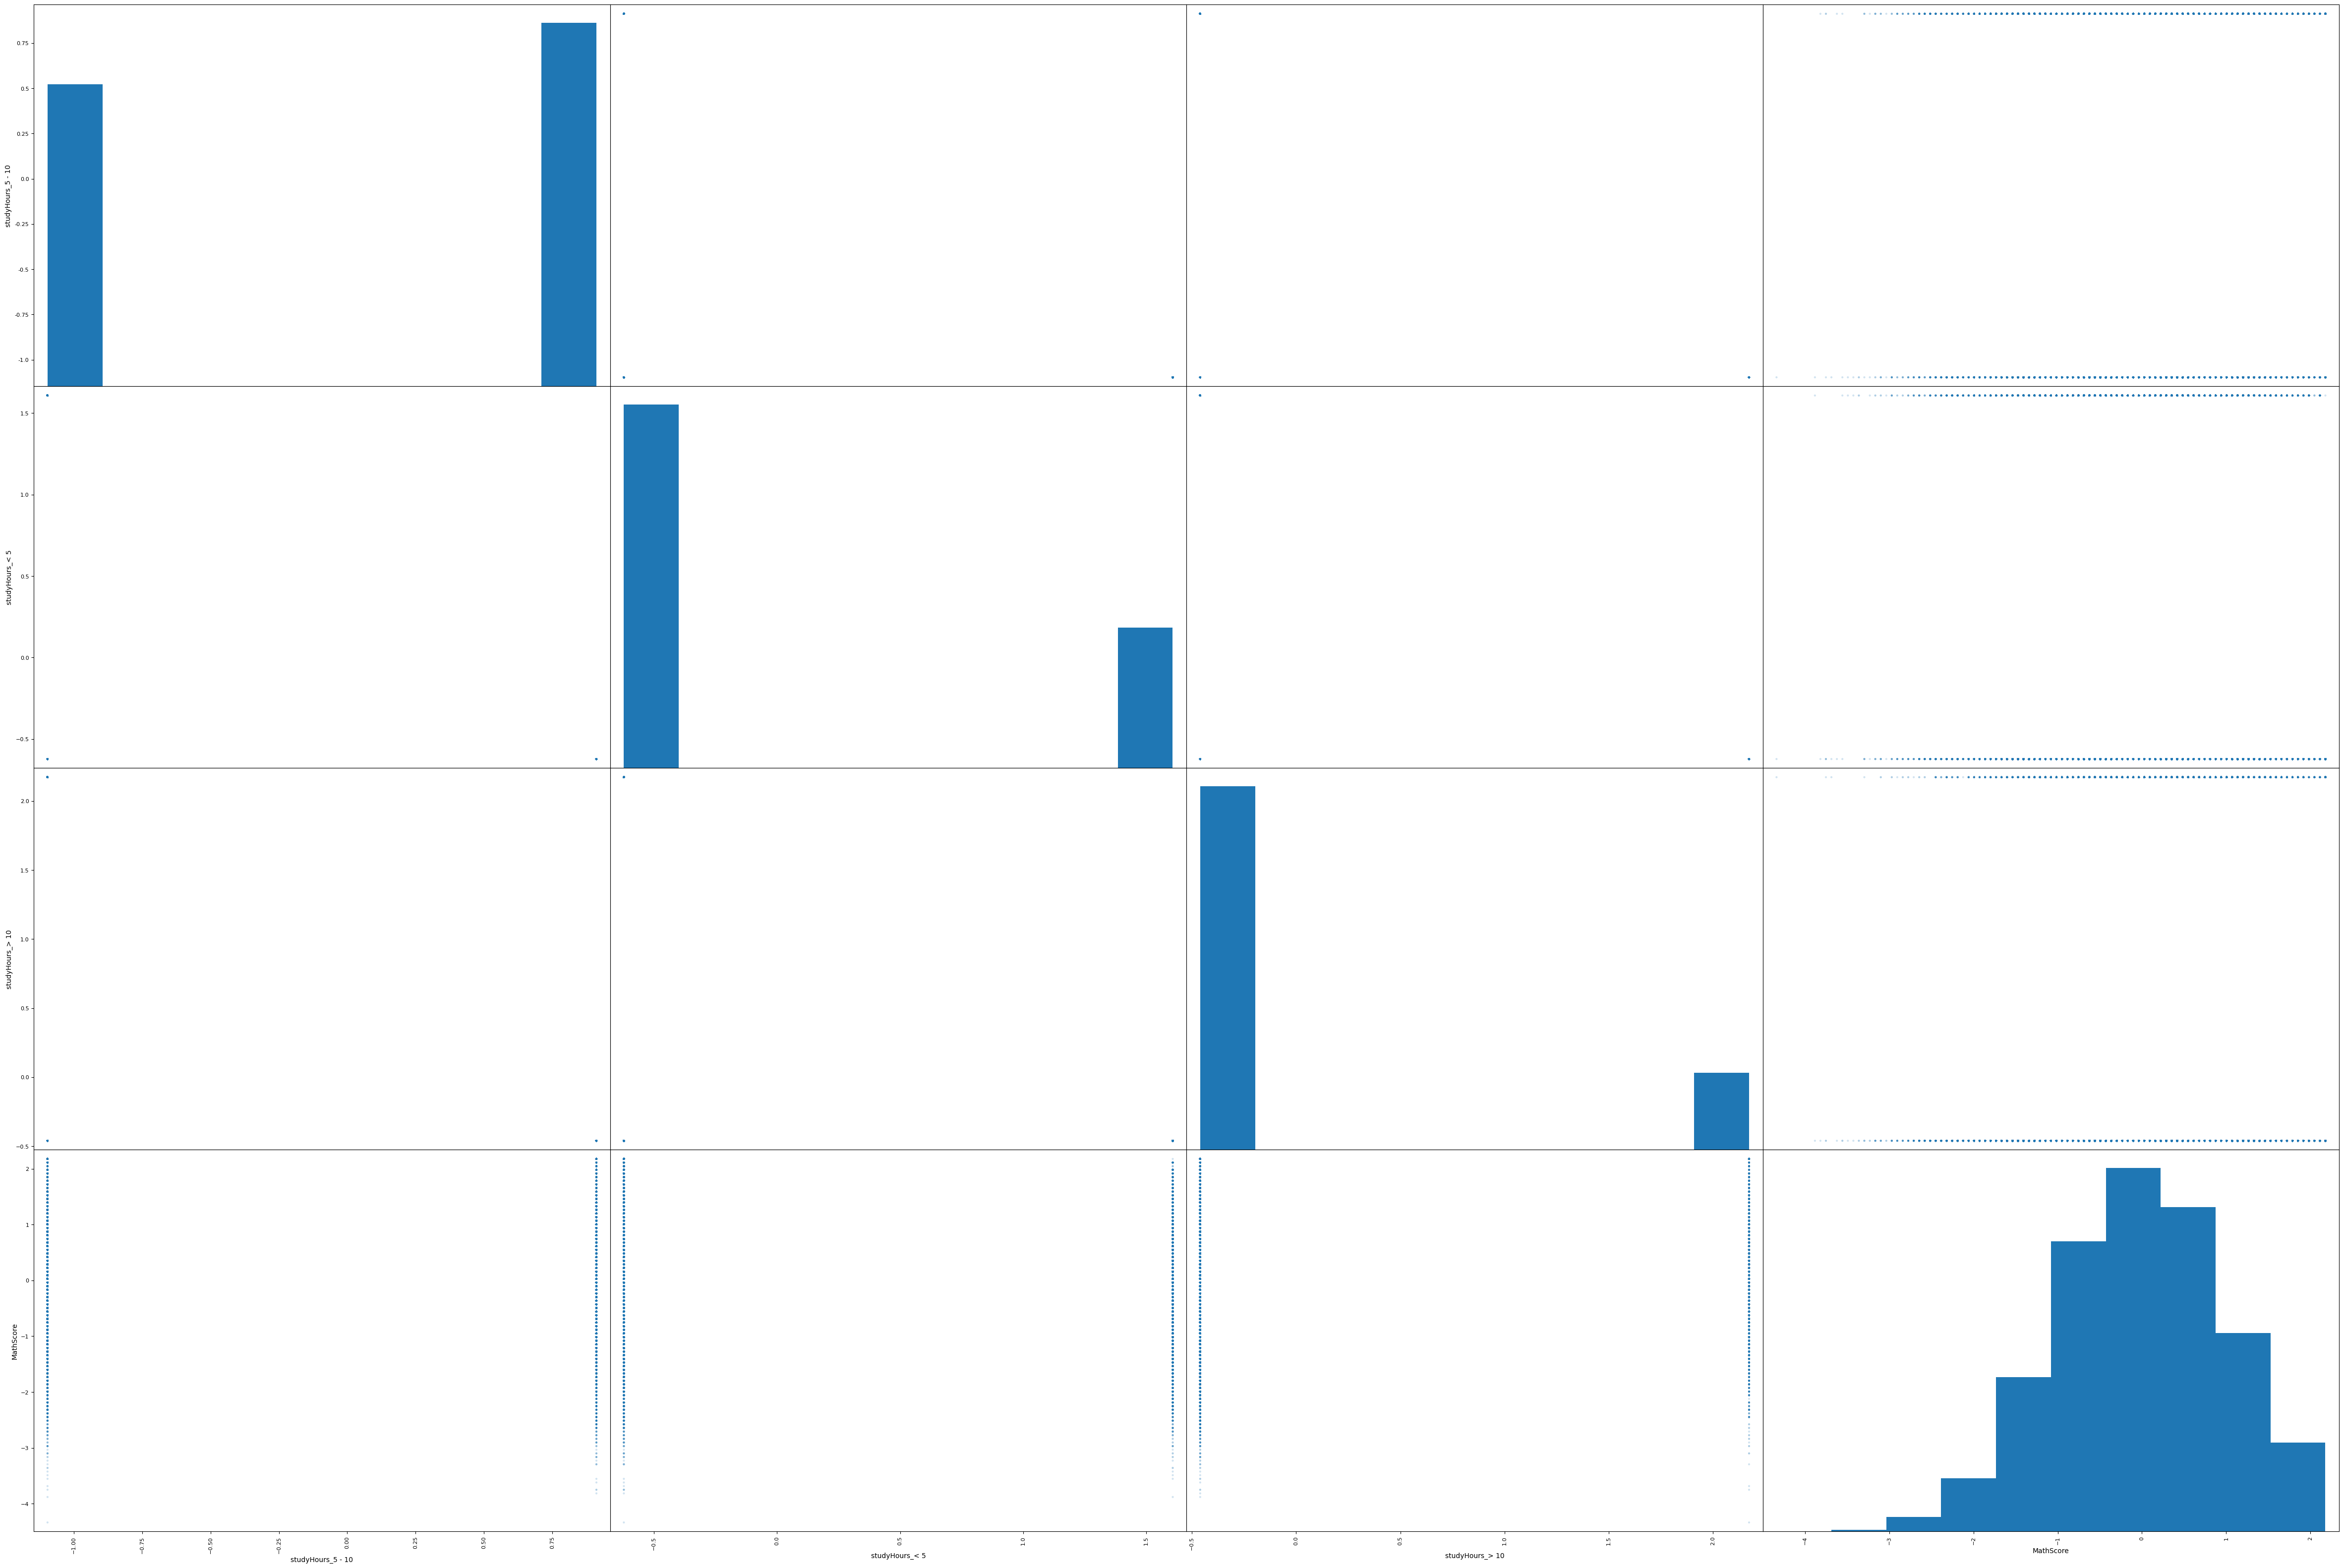

In [35]:
attributes = ['studyHours_5 - 10','studyHours_< 5','studyHours_> 10','MathScore']

scatter_matrix(dsn[attributes], figsize=(60,40),alpha=0.2)
plt.show()

<p> Come da aspettative, le ore di studio influiscono sulla distribuzione del punteggio in matematica, manteniamo dunque le colonne all'interno del Dataset</p>

<p> Arrivati a questo punto possiamo considerare concluso il preprocessing. L'ultimo passo da effettuare è quello di suddividere il Dataset in Train-set(20%) e Test-set(20%).</p>

In [36]:
X = dsn.drop('MathScore',axis=1)
Y = dsn['MathScore']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

<p> Introduciamo una funzione di ausilio che ci servirà per la visualizzazione delle metriche di valutazione dei modelli che costruiremo, in particolare per ogni modello andiamo a visualizzare le seguenti metriche: </p>

<b>MSE:</b> Mean Squared Error </n>

<img src="./MetricheImg/MSE.png" align='center' width='400' height='400'>

<b>VARIANZA</b>

<img src='MetricheImg/Varianza.png' align='center' width='400' height='400'>

<b>MAE:</b> Mean Absolute Error

<img src="./MetricheImg/MAE.png" align='center' width='400' height='400'>

<b>MAPE:</b> Mean Absolute Percentage Error

<img src="./MetricheImg/MAPE.png" align='center' width='400' height='400'> 

<b>MEDIAN_AE:</b> Median Absolute Error

<img src="./MetricheImg/MEDIAN_AE.png" align='center' width='400' height='400'>

<b>R2</b> 

<img src="./MetricheImg/R2.png" align='center' width='400' height='400'>

<b>R2 CORRETTO</b> 

<img src="./MetricheImg/R2_CORRETTO.png" align='center' width='400' height='400'>

In [37]:
#from sklearn.model_selection import cross_val_predict, cross_val_score

import time

pd.options.display.float_format = '{:.8f}'.format

def compute_performance(modelli,names,X,y):
    score_dict = {}
    score_dict['Modello'] = {}
    score_dict['mse'] = {}
    score_dict['variance'] = {}
    score_dict['mae'] = {}
    score_dict['mape'] = {}
    score_dict['median_ae'] = {}
    score_dict['r2'] = {}
    score_dict['adjusted_r2'] = {}
    
    

    for i in range(len(modelli)):
        value_predictions = modelli[i].predict(X)
        mse = mean_squared_error(y, value_predictions)
        variance = explained_variance_score(y,value_predictions)
        mae = mean_absolute_error(y,value_predictions)
        mape = mean_absolute_percentage_error(y, value_predictions)
        median_ae = median_absolute_error(y, value_predictions)
        r2 = r2_score(y, value_predictions)
        adjusted_r2 = 1 - ( 1-r2 ) * ( len(value_predictions) - 1 ) / ( len(value_predictions) - X.shape[1] - 1 )

        name = names[i]

        score_dict['Modello'][i] = name
        score_dict['mse'][i] = mse
        score_dict['variance'][i] = variance
        score_dict['mae'][i] = mae
        score_dict['mape'][i] = mape
        score_dict['median_ae'][i] = median_ae
        score_dict['r2'][i] = r2
        score_dict['adjusted_r2'][i] = adjusted_r2
        
        
    return score_dict

In [38]:
import pickle
regressori = []
nomi = []

<h1> Modelli SVM </h1>

<p> La prima tipologia di modello che andiamo a sperimentare è il modello basato su machine di supporto</p>

In [39]:
modelli_svm = []

In [40]:
from sklearn.svm import SVR

#svr_reg = SVR()
#svr_reg.fit(X_train,y_train)

# Salviamo il modello sul disco
#filename = './Modelli/svr_reg.sav'
#pickle.dump(svr_reg, open(filename, 'wb'))

In [41]:
# Carichiamo il modello dal disco
filename = './Modelli/svr_reg.sav'
svr_reg = pickle.load(open(filename, 'rb'))

#print(lin_reg)
regressori.append(svr_reg)
nomi.append("SVR Regressor")
modelli_svm.append("SVR Regressor")

<h1>Modelli Lineari</h1></n>

<p> continuiamo con un modello lineare ovvero tramite la tecnica di regressione linerare multipla </p>

In [42]:
modelli_lineari = []

<h2>Linear Regressor</h2>

In [43]:
from sklearn.linear_model import LinearRegression

#lin_reg = LinearRegression()
#lin_reg = lin_reg.fit(X_train, y_train)

# Salviamo il modello sul disco
#filename = './Modelli/lin_reg.sav'
#pickle.dump(lin_reg, open(filename, 'wb'))



In [44]:
# Carichiamo il modello dal disco
filename = './Modelli/lin_reg.sav'
lin_reg = pickle.load(open(filename, 'rb'))
#print(lin_reg)

regressori.append(lin_reg)
nomi.append("Linear Regressor")
modelli_lineari.append("Linear Regressor")

<h1>SGD Regressor</h1>

<p> Aggiungiamo un modello che utilizza la tecnica della discesa stocastica del gradiente </p>

In [45]:
from sklearn.linear_model import SGDRegressor

#sgd_reg = SGDRegressor(random_state=42) 
#sgd_reg.fit(X_train, y_train)

#Salviamo il modello sul disco
#filename = './Modelli/sgd_reg.sav'
#pickle.dump(sgd_reg, open(filename, 'wb'))


In [46]:
#Carichiamo il modello dal disco
filename = './Modelli/sgd_reg.sav'
sgd_reg = pickle.load(open(filename, 'rb'))

#print(lin_reg)
regressori.append(sgd_reg)
nomi.append("SGD Regressor")
modelli_lineari.append("SGD Regressor")

<h1>Ensemble Models</h1>

<p> Inseriamo anche una serie di regressori che utilizzano tecniche di insieme in particolare abbiamo i seguenti modelli </p>
<ul>
    <li><b>Random Forest regressor</b></li>
    <li><b>AdaBoost regressor</b></li>
    <li><b>Bagging regressor</b></li>
    </ul>

In [47]:
modelli_ensemble = []

<h2>Random Forest</h2>

In [48]:
from sklearn.ensemble import RandomForestRegressor

#forest_reg = RandomForestRegressor(random_state=42) 
#forest_reg.fit(X_train, y_train)

# Salviamo il modello sul disco
#filename = './Modelli/forest_reg.sav'
#pickle.dump(forest_reg, open(filename, 'wb'))


In [49]:
# Carichiamo il modello dal disco
filename = './Modelli/forest_reg.sav'
forest_reg = pickle.load(open(filename, 'rb'))
# print(lin_reg)

regressori.append(forest_reg)
nomi.append("Forest Regressor")
modelli_lineari.append("Forest Regressor")

<h2>AdaBoost Regressor</h2>

In [50]:
from sklearn.ensemble import AdaBoostRegressor

#ada_reg = AdaBoostRegressor(random_state=42)
#ada_reg.fit(X_train, y_train)

# Salviamo il modello sul disco
#filename = './Modelli/ada_reg.sav'
#pickle.dump(ada_reg, open(filename, 'wb'))


In [51]:
# Carichiamo il modello dal disco
filename = './Modelli/ada_reg.sav'
ada_reg = pickle.load(open(filename, 'rb'))
# print(lin_reg)

regressori.append(ada_reg)
nomi.append("Ada Regressor")
modelli_ensemble.append("Ada Regressor")

<h2>Bagging Regressor</h2>

In [52]:
from sklearn.ensemble import BaggingRegressor

#bagging_reg = BaggingRegressor(random_state=42)
#bagging_reg.fit(X_train, y_train)

# Salviamo il modello sul disco
#filename = './Modelli/bagging_reg.sav'
#pickle.dump(bagging_reg, open(filename, 'wb'))

In [53]:
# Carichiamo il modello dal disco
filename = './Modelli/bagging_reg.sav'
bagging_reg = pickle.load(open(filename, 'rb'))
# print(lin_reg)

In [54]:
regressori.append(bagging_reg)
nomi.append("Bagging Regressor")
modelli_ensemble.append("Bagging Regressor")

<h1>Neural networks</h1>

<p> Inseriamo anche un modello basato su reti neurali, fornito direttamente dalla libreria sklearn, che implementa una rete di tipo <b> Multilayer Perceptron </b></p>

In [55]:
reti_neurali = []

In [56]:
from sklearn.neural_network import MLPRegressor

#mlp_reg = MLPRegressor()
#mlp_reg.fit(X_train, y_train)

# Salviamo il modello sul disco
#filename = './Modelli/mlp_reg.sav'
#pickle.dump(mlp_reg, open(filename, 'wb'))

In [57]:
# Carichiamo il modello dal disco
filename = './Modelli/mlp_reg.sav'
mlp_reg = pickle.load(open(filename, 'rb'))
# print(lin_reg)

In [58]:
regressori.append(mlp_reg)
nomi.append("MLP Regressor")
reti_neurali.append("MLP Regressor")

<h1>Modelli ad Albero</h1>


<p> Aggiungiamo un modello basato su alberi di decisione </p>

In [59]:
modelli_alberi = []

<h2>DecisionTree Regressor</h2>

In [60]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Salviamo il modello sul disco
filename = './Modelli/tree_reg.sav'
pickle.dump(tree_reg, open(filename, 'wb'))

In [61]:
# Carichiamo il modello dal disco
filename = './Modelli/tree_reg.sav'
tree_reg = pickle.load(open(filename, 'rb'))
# print(lin_reg)

In [62]:
regressori.append(tree_reg)
nomi.append("DecisionTree Regressor")
modelli_alberi.append("DecisionTree Regressor")

<h1>Regressori basati su Istance</h1>

<p> Infine aggiungiamo una tecnica basata su istanze, ovvero che non costruisce un modello per effettuare la regressione </p>

In [63]:
modelli_istance = []

<h2>K Neighbour Regressor</h2>

In [64]:
from sklearn.neighbors import KNeighborsRegressor

#kn_reg = KNeighborsRegressor()
#kn_reg.fit(X_train, y_train)

# Salviamo il modello sul disco
#filename = './Modelli/kn_reg.sav'
#pickle.dump(kn_reg, open(filename, 'wb'))

In [65]:
# Carichiamo il modello dal disco
filename = './Modelli/kn_reg.sav'
kn_reg = pickle.load(open(filename, 'rb'))
# print(lin_reg)
regressori.append(kn_reg)
nomi.append("K Neighbor Regressor")
modelli_istance.append("K Neighbor Regressor")

<h1>Performance modelli - Training set</h1>

<p> Andiamo ad esaminare le performance che i modelli creati ottengono sul training set </p>

In [66]:
#performance_modelli_training = compute_performance(regressori, nomi, X_train,y_train)
#performance_train = pd.DataFrame(performance_modelli_training)
#performance_train

# Salviamo le performance ottenute su disco
#filename = './Performance/performance_train.csv'
#pickle.dump(performance_train, open(filename, 'wb'))


In [67]:
#Carichiamo il file delle performance dal disco
filename = './Performance/performance_train.csv'
performance_train = pickle.load(open(filename, 'rb'))
performance_train

,Modello,mse,variance,mae,mape,median_ae,r2,adjusted_r2
0,SVR Regressor,0.12650919,0.87369391,0.27716049,1.00067329,0.21676008,0.87369105,0.87352123
1,Linear Regressor,0.14178104,0.85844357,0.30177142,1.06384220,0.25595337,0.85844337,0.85825304
2,SGD Regressor,0.14243252,0.85786024,0.30229816,1.06682183,0.25529574,0.85779292,0.85760172
3,Forest Regressor,0.02265386,0.97738204,0.11874385,0.41722213,0.09773368,0.97738199,0.97735158
4,Ada Regressor,0.17047116,0.83083180,0.33145770,1.03408039,0.28306250,0.82979867,0.82956982
5,Bagging Regressor,0.03057220,0.96947761,0.12947848,0.46487939,0.09773368,0.96947619,0.96943515
6,MLP Regressor,0.12799017,0.87221254,0.28655435,1.00538496,0.24056622,0.87221242,0.87204060
7,DecisionTree Regressor,0.00036926,0.99963132,0.00112587,0.00346411,0.00000000,0.99963132,0.99963083
8,K Neighbor Regressor,0.26813753,0.73239805,0.40618644,1.15608412,0.32577895,0.73228688,0.73192693


<p> Osserviamo che, sul training set, tutti i modelli ottengono delle ottime performance in quanto tutti hanno misure di errore molto basse, e indici come r2 ed r2 corretto molto alti, che indicano che il modello spiega in modo fedele la variabilità del fenomeno analizzato, nel nostro caso, il punteggio in matematica. Tuttavia, come ben sappiamo, un buon modello non si distingue per le sue prestazioni sul training set ma sulla sua capacità di generalizzare e quindi sulle prestazioni che esso riesce ad ottenere su dei dati che non sono stati usati in fase di training. Pertanto, nella prossima sezione andiamo a visualizzare le performance sul test set e a fare le dovute considerazioni </p>

<h1>Performance modelli - Test set</h1>

In [68]:
#performance_modelli_training = compute_performance(regressori, nomi, X_test,y_test)
#performance_test = pd.DataFrame(performance_modelli_training)
#performance_test

# Salviamo le performance ottenute su disco
#filename = './Performance/performance_test.csv'
#pickle.dump(performance_test, open(filename, 'wb'))


In [69]:
# Carichiamo il file delle performance dal disco
filename = './Performance/performance_test.csv'
performance_test = pickle.load(open(filename, 'rb'))
performance_test

,Modello,mse,variance,mae,mape,median_ae,r2,adjusted_r2
0,SVR Regressor,0.15777038,0.84117666,0.31683995,1.25622141,0.26504192,0.84117378,0.84031606
1,Linear Regressor,0.14473712,0.85429879,0.30394862,1.17762955,0.25705118,0.85429426,0.85350740
2,SGD Regressor,0.14561856,0.85344290,0.30513081,1.18041993,0.26105887,0.85340691,0.85261526
3,Forest Regressor,0.16348223,0.83542374,0.32194532,1.26116862,0.27039653,0.83542369,0.83453493
4,Ada Regressor,0.17732240,0.82309435,0.33838960,1.12745686,0.29089592,0.82149090,0.82052689
5,Bagging Regressor,0.17734129,0.82148611,0.33412155,1.29889482,0.28016990,0.82147189,0.82050778
6,MLP Regressor,0.15808610,0.84087139,0.31762841,1.23967773,0.26852226,0.84085594,0.83999651
7,DecisionTree Regressor,0.30145926,0.69666575,0.44029979,1.71229963,0.39093474,0.69652328,0.69488440
8,K Neighbor Regressor,0.42056169,0.57662946,0.51076480,1.48186081,0.43002821,0.57662378,0.57433741


<p> Come si può osservare, in generale si hanno delle performance più basse sul test set per tutti i modelli, tuttavia le metriche ottenute non sono pessime, anzi alcuni modelli conservano un ottimo comportamento passando dal training set al test set. E' interessante osservare come il modello basato su decision tree (che sul training set si distingue per delle metriche particolarmente buone, molto migliori rispetto a quelle degli altri modelli), sul test set abbia quasi dimezzato la propria capacità di spiegare il fenomeno; questo ci fornisce una indicazione che il modello potrebbe essere troppo complesso, e quindi, troppo specifico per il training set; di conseguenza, la sua capacità di generalizzare è limitata. Osserviamo anche che il modello basato su alberi di decisione è quello che ha prestazioni peggiori anche in termini di errore sulle previsioni</p>

<h1>CONCLUSIONI</h1>

<p>A questo punto, una volta costruiti i modelli, possiamo analizzarne le caratteristiche per cercare di comprendere quali sono gli aspetti che influenzano maggiormente il punteggio in matematica</p><br>
<p>Una prima osservazione che è possibile fare è che sicuramente il punteggio in matematica viene influenzato dal punteggio ottenuto in prove di scrittura e lettura, questo viene suggerito dall'altissima correlazione tra queste caratteristiche, e soddisfa le aspettative in quanto avere delle buone abilità nel comprendere e maneggiare un testo permette sicuramente di comprendere in maniera più efficiente e veloce concetti matematici più o meno complessi.</p><br>
<p>Andiamo adesso a sfruttare la features importance che è possibile estrarre dai modelli per scoprire eventuali relazioni non immediate che influiscono sul punteggio in matematica, facciamo questa operazione scegliendo 2 modelli tra quelli che meglio hanno performato sul test set; In particolare utilizziamo il modello basato sulla discesa stocastica del gradiente e il modello che utilizza la regressione lineare multipla</p>

In [70]:
from sklearn.inspection import permutation_importance
labels = np.delete(dsn.columns.values, np.where(dsn.columns.values == 'MathScore' ))
labels = np.delete(labels, np.where(labels=='RWScore'))
def plotFeaturesImportance(model):
    result = permutation_importance(sgd_reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
    importances = result.importances_std
    importances = np.delete(importances, len(importances)-1)
    forest_importances = pd.Series(importances, index=labels)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=importances, ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()

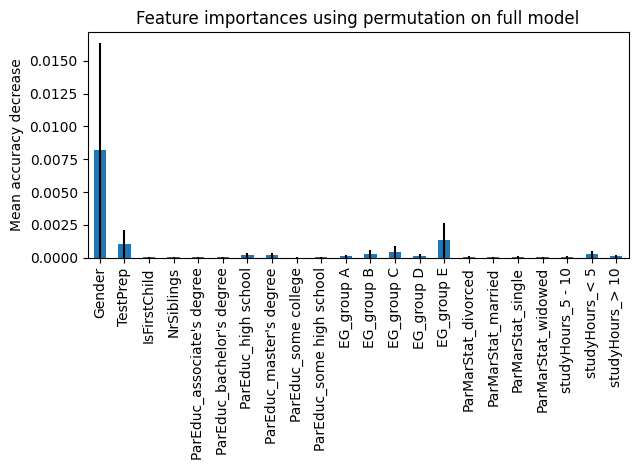

In [71]:
plotFeaturesImportance(sgd_reg)

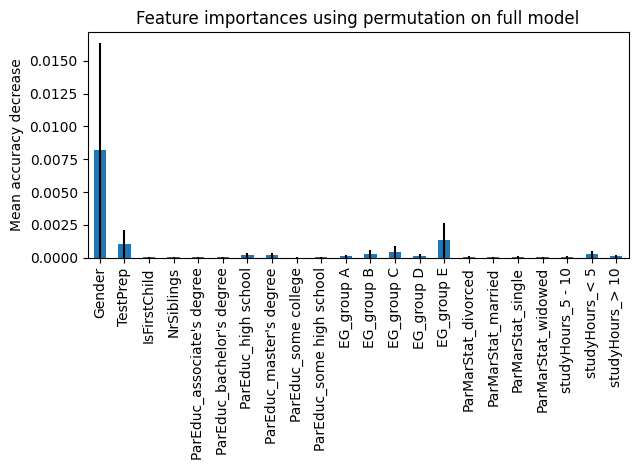

In [72]:
plotFeaturesImportance(lin_reg)

<p>Come possiamo vedere, oltre al punteggio nelle prove di Reading e Writing, vi sono altri fattori che influenzano (anche se in misura minore) le performance degli studenti sulle prove di matematica. Il sesso dello studente, ad esempio, risulta essere una caratteristica rilevante, nonostante recenti studi abbiano dimostrato come il cervelo umano si approcci in modo analogo ai problemi logico-matematici a prescindere dal sesso. Pertanto questa caratteristica potrebbe essere propria del campione utilizzato e non un fattore reale, la questione richiederebbe delle analisi più approfondite (magari con dati nuovi). </p><br>
<p>La seconda feature che risulta avere una rilevanza nell'analisi è il gruppo etnico di appartenenza dello studente o della studentessa, questo potrebbe essere dovuto non ad un fattore biologico ma bensì potrebbero esserci dei fattori culturali legati alle etnie che rendono alcuni popoli particolarmente eccellenti dal punto di vista del ragionamento logico/matematico</p><br>
<p> Un ulteriore fattore che ha rilevanza (come da aspettative) è se lo studente/studentessa ha seguito o meno un corso di preparazione al test sostenuto; ma questo è ragionevole e non richiede commenti particolari</p><br>
<p> Infine risultano avere rilevanza (seppur in misura minore) anche le ore che lo studente/studentessa mediamente dedica allo studio (che tuttavia è una relazione che ci aspettavamo e che non suscita stupore) e il titolo di studio dei genitori, quest'ultimo probabilmente dovuto al fatto che, persone che hanno avuto la possibilità di studiare tendono a comprendere ed apprezzare l'importanza dello studio e della cultura e di conseguenza spingono maggiormente i propri figli a dedicare maggiore impegno allo studio </p>